## Model no 2

Target:
+ life_ladder  

Features:
+ log_gdp_per_capita
+ social_support
+ healthy_life_expectancy_at_birth

import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
model_name = 'model_02'

function section

In [3]:
def adjusted_r2(y,y_pred, X):
    adjusted_r2 = 1 - ((1 - r2_score(y, y_pred)) * (len(X) - 1) / (len(X) - X.shape[1] - 1))
    return adjusted_r2 

In [4]:
df = pd.read_csv("../data/life_ladder_2005_2022_no2_gdp_sosupp_lifeexp.txt", delimiter=',')
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.lower()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country_name                      2121 non-null   object 
 1   year                              2121 non-null   int64  
 2   life_ladder                       2121 non-null   float64
 3   log_gdp_per_capita                2121 non-null   float64
 4   social_support                    2121 non-null   float64
 5   healthy_life_expectancy_at_birth  2121 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 99.6+ KB


Define features and Target:

In [6]:
features = df.columns.tolist()
features.remove('country_name')
features.remove('year')
features.remove('life_ladder')

X = df[features]
y = df['life_ladder']

In [7]:
X.columns

Index(['log_gdp_per_capita', 'social_support',
       'healthy_life_expectancy_at_birth'],
      dtype='object')

In [8]:
print(X.shape, y.shape)

(2121, 3) (2121,)


Train-Test-Split:

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.3, random_state=123)

In [10]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1484, 3) (637, 3) (1484,) (637,)


In [11]:
X_train.describe()

,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth
count,1484.000000,1484.000000,1484.000000
mean,9.392291,0.813114,63.350488
std,1.154983,0.121191,6.931555
min,5.527000,0.291000,6.720000
25%,8.502750,0.748000,59.418750
50%,9.527000,0.841000,65.140000
75%,10.362500,0.908250,68.525000
max,11.664000,0.985000,74.475000


Scaling with StandartScaler and MinMaxScaler  
we will use the scaled data for KNN and Linear Regression

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Scatterplot with scaled and non-scaled data, both features (correlation)

In [13]:
X_train_scaled.shape

(1484, 3)

In [14]:
normalizer = MinMaxScaler()
X_train_normalized = normalizer.fit_transform(X_train)
X_test_normalized = normalizer.transform(X_test)

<Axes: xlabel='healthy_life_expectancy_at_birth', ylabel='life_ladder'>

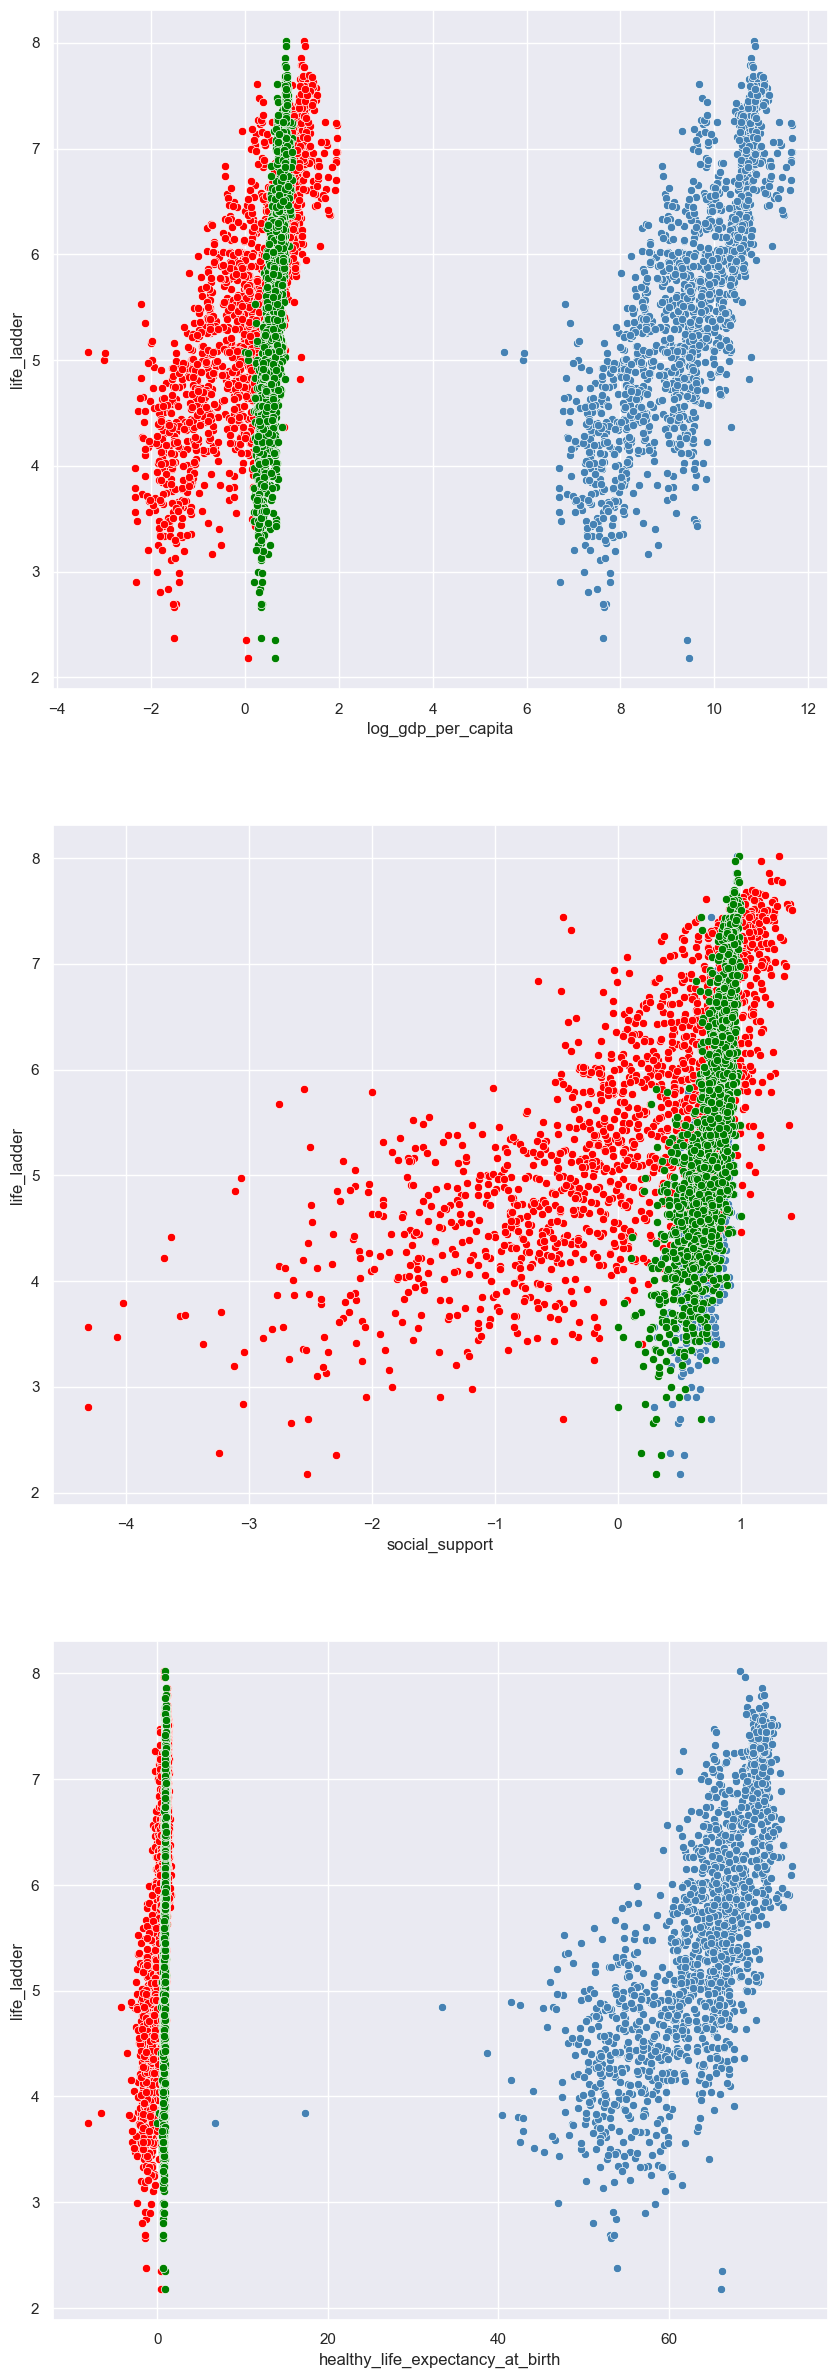

In [47]:
fig,ax = plt.subplots(3,1,figsize=(10,30))
sns.scatterplot(ax= ax[0], x = X_train.log_gdp_per_capita, y = y_train, color = 'steelblue')
sns.scatterplot(ax= ax[0], x = X_train_scaled[:,0], y = y_train, color = 'red')
sns.scatterplot(ax= ax[0], x = X_train_normalized[:,0], y = y_train, color = 'green')
sns.scatterplot(ax= ax[1], x = X_train.social_support, y = y_train, color = 'steelblue')
sns.scatterplot(ax= ax[1], x = X_train_scaled[:,1], y = y_train, color = 'red')
sns.scatterplot(ax= ax[1], x = X_train_normalized[:,1], y = y_train, color = 'green')
sns.scatterplot(ax= ax[2], x = X_train.healthy_life_expectancy_at_birth, y = y_train, color = 'steelblue')
sns.scatterplot(ax= ax[2], x = X_train_scaled[:,2], y = y_train, color = 'red')
sns.scatterplot(ax= ax[2], x = X_train_normalized[:,2], y = y_train, color = 'green')

Remember:   
**R2 should be as high as possible**  

(For example: an R2 of 0.917 will be interpreted as 91,70% of the variation in x can be explained by y (and vice versa). The rest (8,30%) is noise, which cannot refer to the variables.)  

**RMSE should be low as possible**

Linear Regression with variable polynomio

In [69]:
lin_reg_error_lst = []

for i in range(1,7):
    polynomial_features = PolynomialFeatures(degree=i, include_bias=False)
    x_poly_train = polynomial_features.fit_transform(X_train_scaled)
    x_poly_test = polynomial_features.transform(X_test_scaled)

    lin_reg_poly = LinearRegression()
    lin_reg_poly.fit(x_poly_train,y_train)

    y_pred_poly_test = lin_reg_poly.predict(x_poly_test)
    y_pred_poly_train = lin_reg_poly.predict(x_poly_train)

    rmse_test = mean_squared_error(y_test, y_pred_poly_test, squared=False).round(3)
    r2_test = adjusted_r2(y_test, y_pred_poly_test, X_test_scaled).round(3)
    rmse_train = mean_squared_error(y_train, y_pred_poly_train, squared=False).round(3)
    r2_train = adjusted_r2(y_train, y_pred_poly_train, X_train_scaled).round(3)
    
    delta_rmse = abs(rmse_train - rmse_test)
    delta_r2 = abs(r2_train - r2_test)
    
    model_descrip = model_name + '_lin_reg_' + str(i)
    lin_reg_error_lst.append({'model_name': model_descrip, 
                      'train_rmse': rmse_train, 
                      'train_r2':r2_train, 
                      'test_rmse': rmse_test, 
                      'test_r2':r2_test,
                      'delta_RMSE':delta_rmse,
                      'delta_R2':delta_r2})

lin_reg_error_df = pd.DataFrame(lin_reg_error_lst)
lin_reg_error_df.sort_values(by = ['delta_R2', 'test_r2'], ascending=[True, False])


,model_name,train_rmse,train_r2,test_rmse,test_r2,delta_RMSE,delta_R2
2,model_02_lin_reg_3,0.561,0.749,0.583,0.738,0.022,0.011
0,model_02_lin_reg_1,0.620,0.694,0.645,0.679,0.025,0.015
3,model_02_lin_reg_4,0.557,0.753,0.586,0.735,0.029,0.018
1,model_02_lin_reg_2,0.570,0.741,0.599,0.723,0.029,0.018
4,model_02_lin_reg_5,0.536,0.771,0.603,0.720,0.067,0.051
5,model_02_lin_reg_6,0.520,0.784,0.644,0.680,0.124,0.104


lin_reg_sc = LinearRegression()
lin_reg_sc.fit(X_train_scaled,y_train)

y_pred_linreg_test = lin_reg_sc.predict(X_test_normalized)
y_pred_linreg_train = lin_reg_sc.predict(X_train_normalized)

rmse_test = mean_squared_error(y_test, y_pred_linreg_test, squared=False).round(3)
r2_test = adjusted_r2(y_test, y_pred_linreg_test, X_test).round(3)
rmse_train = mean_squared_error(y_train, y_pred_linreg_train, squared=False).round(3)
r2_train = adjusted_r2(y_train, y_pred_linreg_train, X_train).round(3)

delta_rmse = abs(rmse_train - rmse_test)
delta_r2 = abs(r2_train - r2_test)

lin_reg_error_lst.append({'model_name': model_name + '_lin_reg_scaled', 
                        'train_rmse': rmse_train, 
                        'train_r2':r2_train, 
                        'test_rmse': rmse_test, 
                        'test_r2':r2_test,
                        'delta_RMSE':delta_rmse,
                        'delta_R2':delta_r2})

/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_69864/1132391817.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


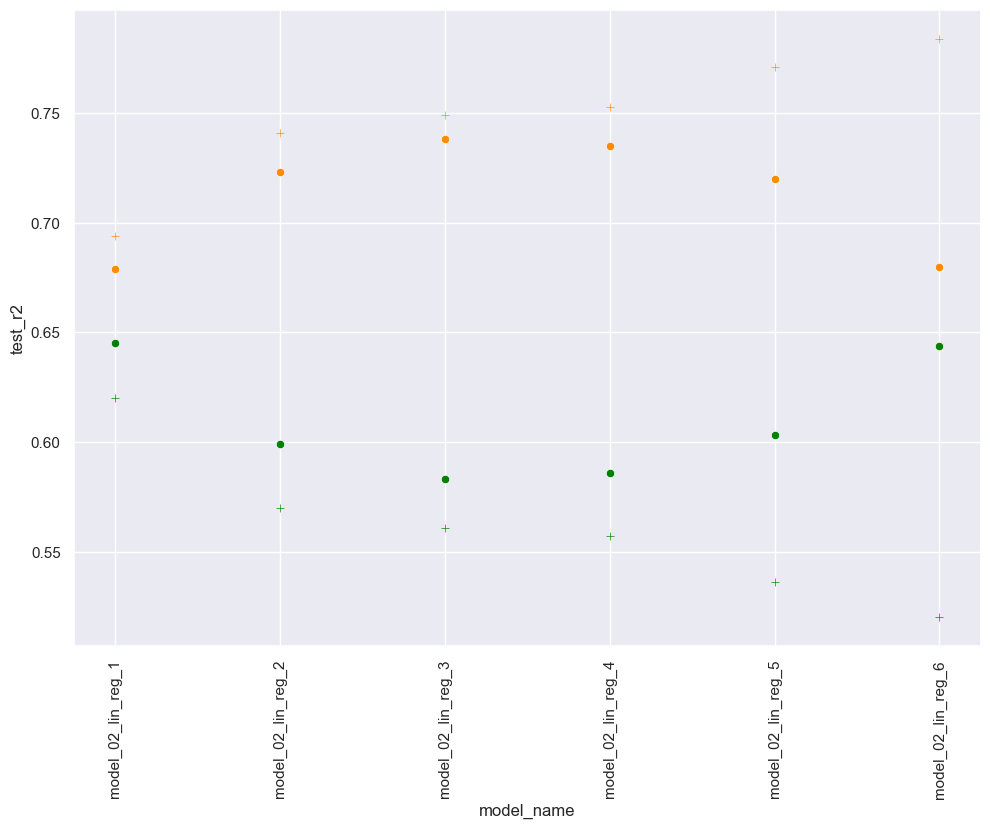

In [70]:
g = sns.scatterplot(data = lin_reg_error_df, x = 'model_name', y = 'test_r2', color = 'darkorange')
g = sns.scatterplot(data = lin_reg_error_df, x = 'model_name', y = 'test_rmse', color = 'green')
g = sns.scatterplot(data = lin_reg_error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange')
g = sns.scatterplot(data = lin_reg_error_df, x = 'model_name', y = 'train_rmse', marker='+', color = 'green')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show();

cross validation for scaled data

In [20]:
lin_reg_cv_score_lst = []
count = 0
for pre_data in [[X_train, X_test], [X_train_scaled, X_test_scaled], [X_train_normalized, X_test_normalized]]:
    lin_reg_scaled = LinearRegression()
    cv_scores = cross_val_score(lin_reg_scaled, pre_data[0], y_train, cv=5, n_jobs=-1)

    model_descrip = model_name + '_lin_reg_scaler_'  + str(count)
    lin_reg_cv_score_lst.append({'model_name': model_descrip,
                          'cv_score': round(cv_scores.mean(), 3)})
    
    count += 1

lin_reg_cv_score_df = pd.DataFrame(lin_reg_cv_score_lst)
lin_reg_cv_score_df.sort_values(by = 'cv_score', ascending= False)

,model_name,cv_score
0,model_02_lin_reg_scaler_0,0.693
1,model_02_lin_reg_scaler_1,0.693
2,model_02_lin_reg_scaler_2,0.693


part df with the best models:

In [50]:
part_lin_reg = lin_reg_error_df.sort_values(by =['test_r2', 'delta_R2'], ascending=[False, True]).iloc[:3]
part_lin_reg

,model_name,train_rmse,train_r2,test_rmse,test_r2,delta_RMSE,delta_R2
2,model_02_lin_reg_3,0.561,0.749,0.583,0.738,0.022,0.011
3,model_02_lin_reg_4,0.557,0.753,0.586,0.735,0.029,0.018
1,model_02_lin_reg_2,0.570,0.741,0.599,0.723,0.029,0.018


---

### KNN Model 

+ with variable number of neighbors and variable distance metrics
+ unscaled!! - now with standart scaler

In [83]:
knn_error_lst = []
for metr in range(1,4):
    for neigh in np.arange(20,41,5): 
        knn = KNeighborsRegressor(n_neighbors=neigh, p=metr)
        knn.fit(X_train_scaled, y_train)

        y_pred_knn_test = knn.predict(X_test_scaled)
        y_pred_knn_train = knn.predict(X_train_scaled)
        rmse_test = mean_squared_error(y_test, y_pred_knn_test, squared=False).round(3)
        r2_test = adjusted_r2(y_test, y_pred_knn_test, X_test_scaled).round(3)
        rmse_train = mean_squared_error(y_train, y_pred_knn_train, squared=False).round(3)
        r2_train = adjusted_r2(y_train, y_pred_knn_train, X_train_scaled).round(3)
        
        delta_rmse = abs(rmse_train - rmse_test)
        delta_r2 = abs(r2_train - r2_test)

        model_descrip = model_name + '_knn_'  + str(metr) + '_' + str(neigh)
        knn_error_lst.append({'model_name': model_descrip, 
                      'train_rmse': rmse_train, 
                      'train_r2':r2_train, 
                      'test_rmse': rmse_test, 
                      'test_r2':r2_test,
                      'delta_RMSE':delta_rmse,
                      'delta_R2':delta_r2})
        
knn_error_df = pd.DataFrame(knn_error_lst)
knn_error_df.sort_values(by = ['delta_R2', 'test_r2'], ascending=[True, False])
#knn_error_df.sort_values(by = ['test_r2', 'delta_R2'], ascending=[False, True])

,model_name,train_rmse,train_r2,test_rmse,test_r2,delta_RMSE,delta_R2
4,model_02_knn_1_40,0.516,0.788,0.546,0.770,0.030,0.018
9,model_02_knn_2_40,0.518,0.786,0.549,0.768,0.031,0.018
2,model_02_knn_1_30,0.508,0.794,0.540,0.775,0.032,0.019
8,model_02_knn_2_35,0.514,0.789,0.547,0.770,0.033,0.019
14,model_02_knn_3_40,0.521,0.784,0.552,0.765,0.031,0.019
12,model_02_knn_3_30,0.511,0.792,0.543,0.772,0.032,0.020
3,model_02_knn_1_35,0.512,0.791,0.545,0.771,0.033,0.020
13,model_02_knn_3_35,0.516,0.788,0.549,0.768,0.033,0.020
1,model_02_knn_1_25,0.503,0.798,0.539,0.776,0.036,0.022
7,model_02_knn_2_30,0.508,0.795,0.543,0.773,0.035,0.022


/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_69864/2214502480.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


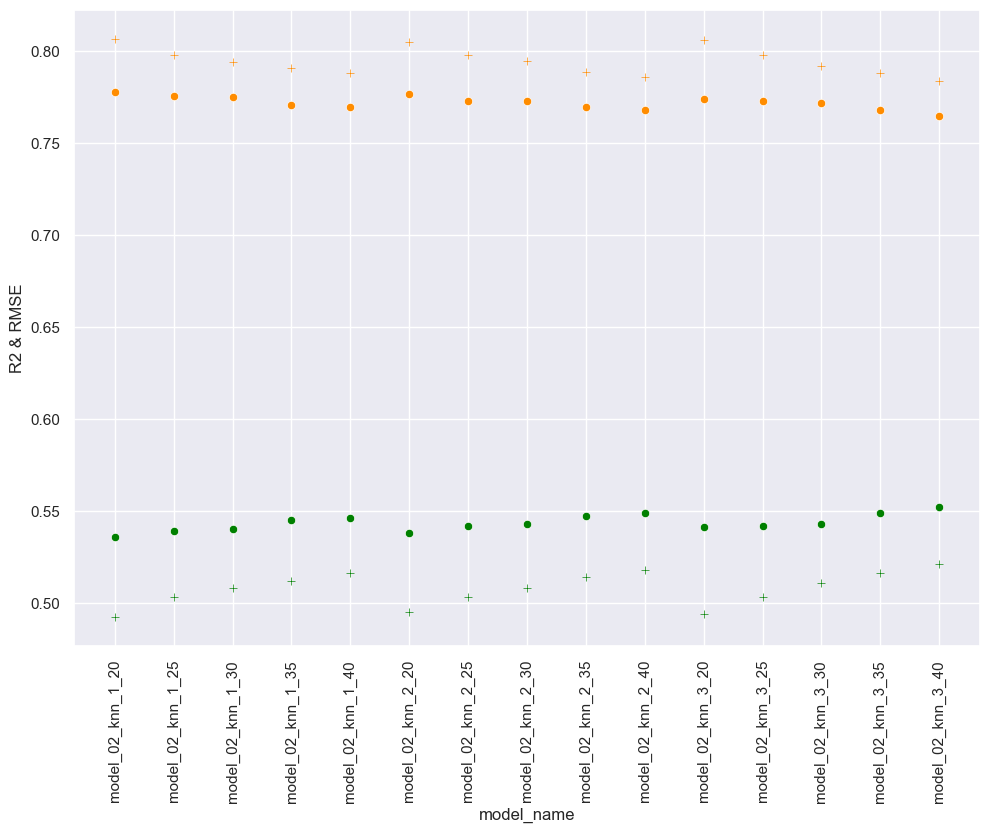

In [81]:
g=sns.scatterplot(data = knn_error_df, x = 'model_name', y = 'test_r2', color = 'darkorange')
g=sns.scatterplot(data = knn_error_df, x = 'model_name', y = 'test_rmse', color = 'green')
g=sns.scatterplot(data = knn_error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange')
g=sns.scatterplot(data = knn_error_df, x = 'model_name', y = 'train_rmse', marker='+', color = 'green')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(ylabel='R2 & RMSE')
plt.show();

In [84]:
#part_knn = knn_error_df.sort_values(by = ['test_r2', 'delta_R2'], ascending=[False, True]).iloc[:5]
part_knn = knn_error_df.sort_values(by = ['delta_R2', 'test_r2'], ascending=[True, False]).iloc[:6]
part_knn

,model_name,train_rmse,train_r2,test_rmse,test_r2,delta_RMSE,delta_R2
4,model_02_knn_1_40,0.516,0.788,0.546,0.770,0.030,0.018
9,model_02_knn_2_40,0.518,0.786,0.549,0.768,0.031,0.018
2,model_02_knn_1_30,0.508,0.794,0.540,0.775,0.032,0.019
8,model_02_knn_2_35,0.514,0.789,0.547,0.770,0.033,0.019
14,model_02_knn_3_40,0.521,0.784,0.552,0.765,0.031,0.019
12,model_02_knn_3_30,0.511,0.792,0.543,0.772,0.032,0.020


scaling data

In [85]:
knn_cv_score_lst = []
count = 0
for pre_data in [[X_train, X_test], [X_train_scaled, X_test_scaled], [X_train_normalized, X_test_normalized]]:
    knn_scaled = KNeighborsRegressor(n_neighbors= 40, p = 1)
    cv_scores = cross_val_score(knn_scaled, pre_data[0], y_train, cv=5, n_jobs=-1)

    model_descrip = model_name + '_knn_scaler_'  + str(count)
    knn_cv_score_lst.append({'model_name': model_descrip,
                          'cv_score': round(cv_scores.mean(), 3)})
    
    count += 1

knn_cv_score_df = pd.DataFrame(knn_cv_score_lst)
knn_cv_score_df.sort_values(by = 'cv_score', ascending= False)

,model_name,cv_score
1,model_02_knn_scaler_1,0.770
2,model_02_knn_scaler_2,0.770
0,model_02_knn_scaler_0,0.699


Decision Tree Model

In [99]:
dtree = DecisionTreeRegressor(max_depth = 4, 
                            max_leaf_nodes = 14)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, max_leaf_nodes=14)

In [25]:
y_pred_dec_test = dtree.predict(X_test)
y_pred_dec_train = dtree.predict(X_train)
rmse_test = mean_squared_error(y_test, y_pred_dec_test, squared=False).round(3)
r2_test = adjusted_r2(y_test, y_pred_dec_test, X_test).round(3)
rmse_train = mean_squared_error(y_train, y_pred_dec_train, squared=False).round(3)
r2_train = adjusted_r2(y_train, y_pred_dec_train, X_train).round(3)

print('train_rmse ', rmse_train) 
print('train_r2 ', r2_train)
print('test_rmse ', rmse_test)
print('test_r2 ',r2_test)

train_rmse  0.544
train_r2  0.765
test_rmse  0.603
test_r2  0.72


In [100]:
dtree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': 14,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

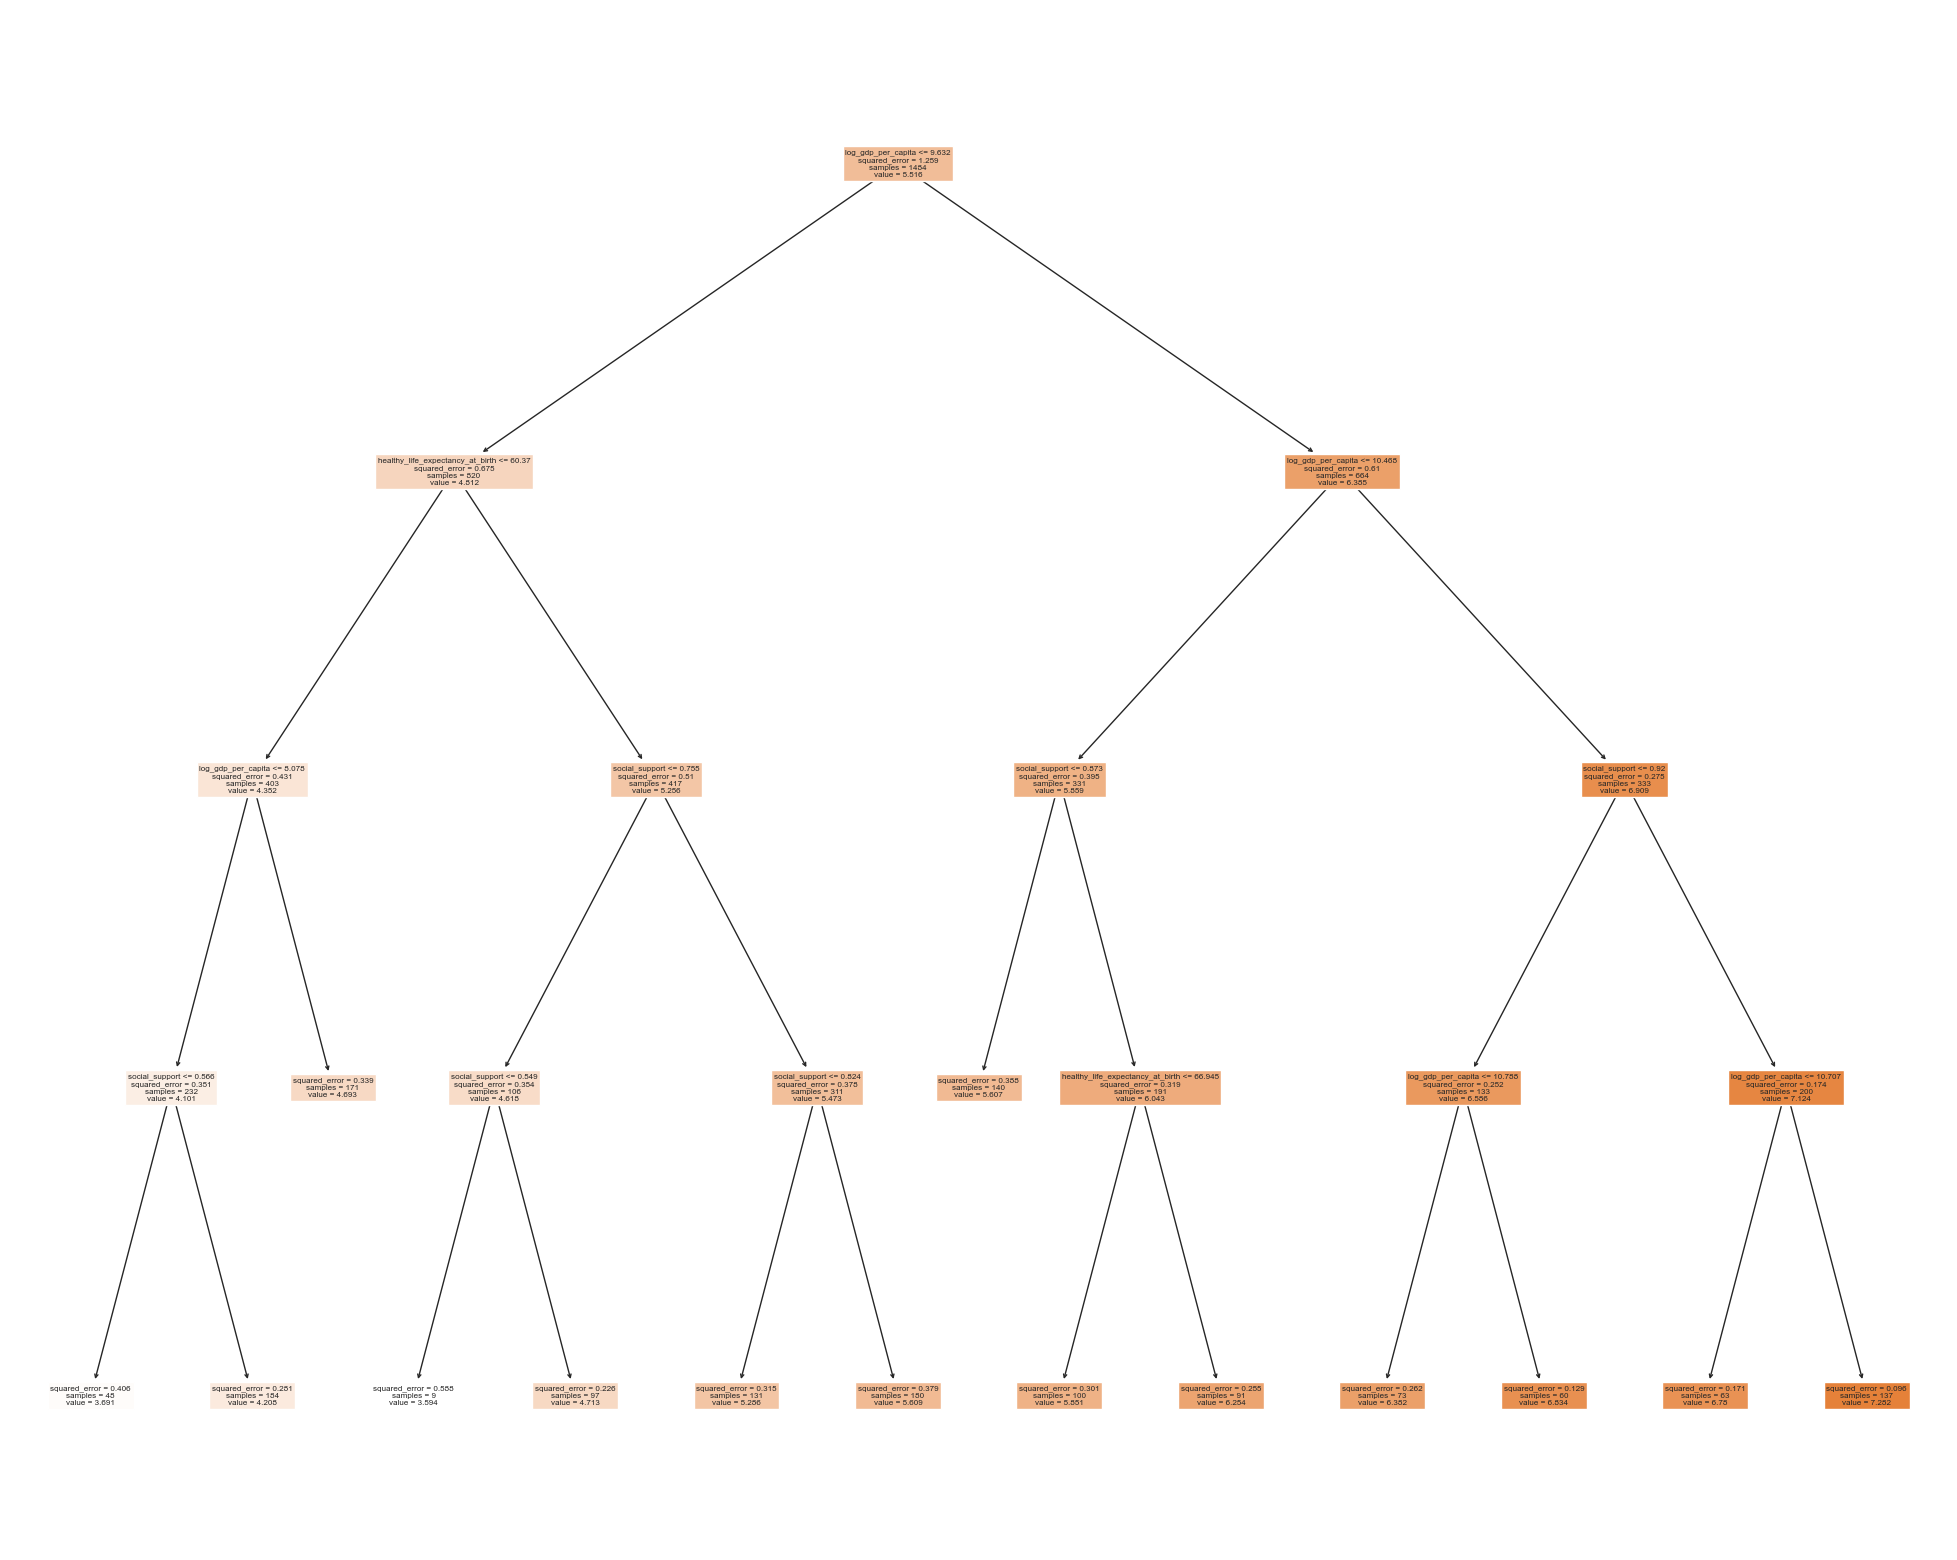

In [101]:
fig = plt.figure(figsize=(25,20))
dtree_plot = plot_tree(dtree, filled=True,
                       feature_names=X_train.columns)

In [97]:
dectree_error_lst = []
for depth in np.arange(4,7,1):
    for leaf in np.arange(8,21,6): 
        dectree = DecisionTreeRegressor(
                            max_depth = depth, 
                            max_leaf_nodes = leaf,
                            splitter = 'best')
        dectree.fit(X_train, y_train)
        y_pred_dec_test = dectree.predict(X_test)
        y_pred_dec_train = dectree.predict(X_train)
        rmse_test = mean_squared_error(y_test, y_pred_dec_test, squared=False).round(3)
        r2_test = adjusted_r2(y_test, y_pred_dec_test, X_test).round(3)
        rmse_train = mean_squared_error(y_train, y_pred_dec_train, squared=False).round(3)
        r2_train = adjusted_r2(y_train, y_pred_dec_train, X_train).round(3)
        
        delta_rmse = abs(rmse_train - rmse_test)
        delta_r2 = abs(r2_train - r2_test)

        model_descrip = model_name + '_dectree_dep_' + str(depth) + '_max_leaf_' + str(leaf)
        dectree_error_lst.append({'model_name': model_descrip, 
                      'train_rmse': rmse_train, 
                      'train_r2':r2_train, 
                      'test_rmse': rmse_test, 
                      'test_r2':r2_test,
                      'delta_RMSE':delta_rmse,
                      'delta_R2':delta_r2})
        

dectree_error_df = pd.DataFrame(dectree_error_lst)
#dectree_error_df.sort_values(by = ['delta_R2', 'test_r2'] , ascending=[True, False])
dectree_error_df.sort_values(by = ['test_r2', 'delta_R2'], ascending=[False, True])

,model_name,train_rmse,train_r2,test_rmse,test_r2,delta_RMSE,delta_R2
5,model_02_dectree_dep_5_max_leaf_20,0.511,0.792,0.577,0.743,0.066,0.049
8,model_02_dectree_dep_6_max_leaf_20,0.511,0.792,0.577,0.743,0.066,0.049
2,model_02_dectree_dep_4_max_leaf_20,0.527,0.779,0.588,0.733,0.061,0.046
1,model_02_dectree_dep_4_max_leaf_14,0.535,0.772,0.590,0.732,0.055,0.040
4,model_02_dectree_dep_5_max_leaf_14,0.533,0.774,0.592,0.730,0.059,0.044
7,model_02_dectree_dep_6_max_leaf_14,0.533,0.774,0.592,0.730,0.059,0.044
0,model_02_dectree_dep_4_max_leaf_8,0.567,0.744,0.611,0.712,0.044,0.032
3,model_02_dectree_dep_5_max_leaf_8,0.567,0.744,0.611,0.712,0.044,0.032
6,model_02_dectree_dep_6_max_leaf_8,0.567,0.744,0.611,0.712,0.044,0.032


/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_69864/3565193089.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


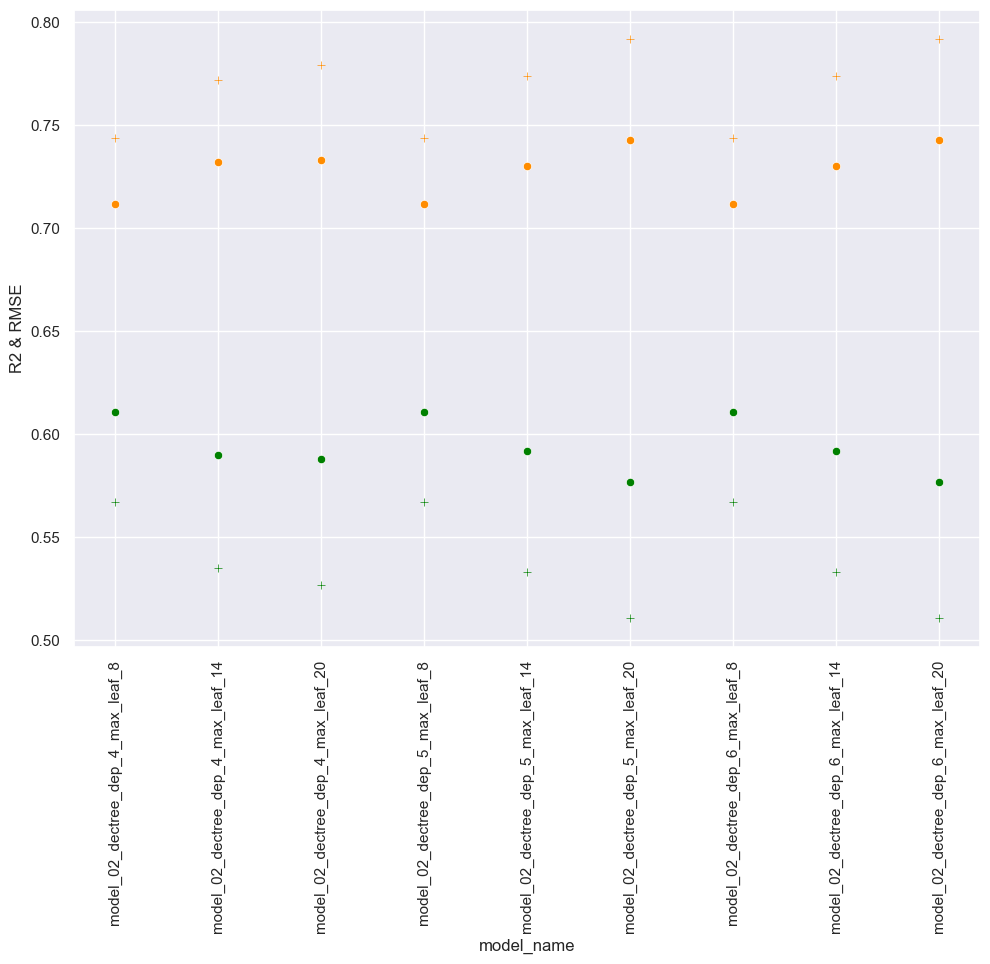

In [96]:
g=sns.scatterplot(data = dectree_error_df, x = 'model_name', y = 'test_r2', color = 'darkorange')
g=sns.scatterplot(data = dectree_error_df, x = 'model_name', y = 'test_rmse', color = 'green')
g=sns.scatterplot(data = dectree_error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange')
g=sns.scatterplot(data = dectree_error_df, x = 'model_name', y = 'train_rmse', marker='+', color = 'green')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(ylabel='R2 & RMSE')
plt.show();

+ It is hard to decide which one is the optimum. But still everything is lower than knn, so we don't have to put so much effort in it.  

part df for the best models:

In [98]:
part_dec_tree = dectree_error_df.sort_values(by = ['test_r2', 'delta_R2'], ascending=[False, True]).iloc[:6]
part_dec_tree

,model_name,train_rmse,train_r2,test_rmse,test_r2,delta_RMSE,delta_R2
5,model_02_dectree_dep_5_max_leaf_20,0.511,0.792,0.577,0.743,0.066,0.049
8,model_02_dectree_dep_6_max_leaf_20,0.511,0.792,0.577,0.743,0.066,0.049
2,model_02_dectree_dep_4_max_leaf_20,0.527,0.779,0.588,0.733,0.061,0.046
1,model_02_dectree_dep_4_max_leaf_14,0.535,0.772,0.590,0.732,0.055,0.040
4,model_02_dectree_dep_5_max_leaf_14,0.533,0.774,0.592,0.730,0.059,0.044
7,model_02_dectree_dep_6_max_leaf_14,0.533,0.774,0.592,0.730,0.059,0.044


Random Forest 

In [108]:
randforest = RandomForestRegressor(n_estimators=100, 
                                random_state=123, 
                                max_depth = 5,
                                max_leaf_nodes = 25,
                                max_features = 'sqrt',
                                n_jobs=-1, verbose = 1)
randforest.fit(X_train, y_train)

n_nodes = []
maximum_depths = []

# Stats about the trees in random forest
for tree_idx in randforest.estimators_:
    n_nodes.append(tree_idx.tree_.node_count)
    maximum_depths.append(tree_idx.tree_.max_depth)

y_pred_randforest_test = randforest.predict(X_test)
y_pred_randforest_train = randforest.predict(X_train)
rmse_test = mean_squared_error(y_test, y_pred_randforest_test, squared=False).round(3)
r2_test = adjusted_r2(y_test, y_pred_randforest_test, X_test).round(3)
rmse_train = mean_squared_error(y_train, y_pred_randforest_train, squared=False).round(3)
r2_train = adjusted_r2(y_train, y_pred_randforest_train, X_train).round(3)

print(f'Min number of nodes: {int(np.min(n_nodes))}')
print(f'Average number of nodes: {int(np.mean(n_nodes))}')
print(f'Max number of nodes: {int(np.max(n_nodes))}')
print(f'Min maximum depth: {int(np.min(maximum_depths))}')
print(f'Average maximum depth: {int(np.mean(maximum_depths))}')
print(f'Max maximum depth: {int(np.max(maximum_depths))}')
print(f'Number of Trees: {len(randforest.estimators_)}')
print('train_rmse ', rmse_train) 
print('train_r2 ', r2_train)
print('test_rmse ', rmse_test)
print('test_r2 ',r2_test)

Min number of nodes: 49
Average number of nodes: 49
Max number of nodes: 49
Min maximum depth: 5
Average maximum depth: 5
Max maximum depth: 5
Number of Trees: 100
train_rmse  0.497
train_r2  0.803
test_rmse  0.555
test_r2  0.763


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [31]:
randforest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': 'sqrt',
 'max_leaf_nodes': 15,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 123,
 'verbose': 1,
 'warm_start': False}

In [111]:
random_trees_error_lst = []
for tree_depth in np.arange(5,8,1):
    for tree_leaf in np.arange(15,31,5): 
        random_forest = RandomForestRegressor(n_estimators=100, 
                                random_state=123, 
                                max_depth = tree_depth,
                                max_leaf_nodes = tree_leaf,
                                max_features = 'sqrt',
                                n_jobs=-1, verbose = 1)
        random_forest.fit(X_train, y_train)
        
        y_pred_random_forest_test = random_forest.predict(X_test)
        y_pred_random_forest_train = random_forest.predict(X_train)
        rmse_test = mean_squared_error(y_test, y_pred_random_forest_test, squared=False).round(3)
        r2_test = adjusted_r2(y_test, y_pred_random_forest_test, X_test).round(3)
        rmse_train = mean_squared_error(y_train, y_pred_random_forest_train, squared=False).round(3)
        r2_train = adjusted_r2(y_train, y_pred_random_forest_train, X_train).round(3)
        
        n_nodes = []
        maximum_depths = []

        for tree_idx in random_forest.estimators_:
            n_nodes.append(tree_idx.tree_.node_count)
            maximum_depths.append(tree_idx.tree_.max_depth)
        
        mean_node_num = int(np.mean(n_nodes))
        mean_depth = int(np.mean(maximum_depths))
        num_of_trees = len(random_forest.estimators_)

        delta_rmse = abs(rmse_train - rmse_test)
        delta_r2 = abs(r2_train - r2_test)

        model_descrip = model_name + '_forest_tree_depth' + str(tree_depth) + '_max_leaf_' + str(tree_leaf)
        random_trees_error_lst.append({'model_name': model_descrip, 
                      'train_rmse': rmse_train, 
                      'train_r2':r2_train, 
                      'test_rmse': rmse_test, 
                      'test_r2':r2_test,
                      'delta_RMSE':delta_rmse,
                      'delta_R2':delta_r2,
                      'mean_node_num': mean_node_num,
                      'mean_depth': mean_depth,
                      'num_of_trees': num_of_trees})
        

random_trees_error_df = pd.DataFrame(random_trees_error_lst)
random_trees_error_df.sort_values(by = ['delta_R2', 'test_r2'], ascending=[True, False])
#random_trees_error_df.sort_values(by = ['test_r2', 'delta_R2'], ascending=[False, True])

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel

,model_name,train_rmse,train_r2,test_rmse,test_r2,delta_RMSE,delta_R2,mean_node_num,mean_depth,num_of_trees
4,model_02_forest_tree_depth6_max_leaf_15,0.513,0.790,0.562,0.756,0.049,0.034,29,5,100
8,model_02_forest_tree_depth7_max_leaf_15,0.513,0.790,0.562,0.756,0.049,0.034,29,5,100
0,model_02_forest_tree_depth5_max_leaf_15,0.515,0.789,0.563,0.755,0.048,0.034,29,5,100
1,model_02_forest_tree_depth5_max_leaf_20,0.504,0.798,0.557,0.761,0.053,0.037,39,5,100
5,model_02_forest_tree_depth6_max_leaf_20,0.500,0.801,0.554,0.763,0.054,0.038,39,5,100
9,model_02_forest_tree_depth7_max_leaf_20,0.498,0.802,0.554,0.763,0.056,0.039,39,6,100
2,model_02_forest_tree_depth5_max_leaf_25,0.497,0.803,0.555,0.763,0.058,0.040,49,5,100
6,model_02_forest_tree_depth6_max_leaf_25,0.489,0.809,0.550,0.767,0.061,0.042,49,6,100
3,model_02_forest_tree_depth5_max_leaf_30,0.493,0.806,0.553,0.764,0.060,0.042,58,5,100
10,model_02_forest_tree_depth7_max_leaf_25,0.487,0.811,0.548,0.768,0.061,0.043,49,6,100


/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_69864/3935140363.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


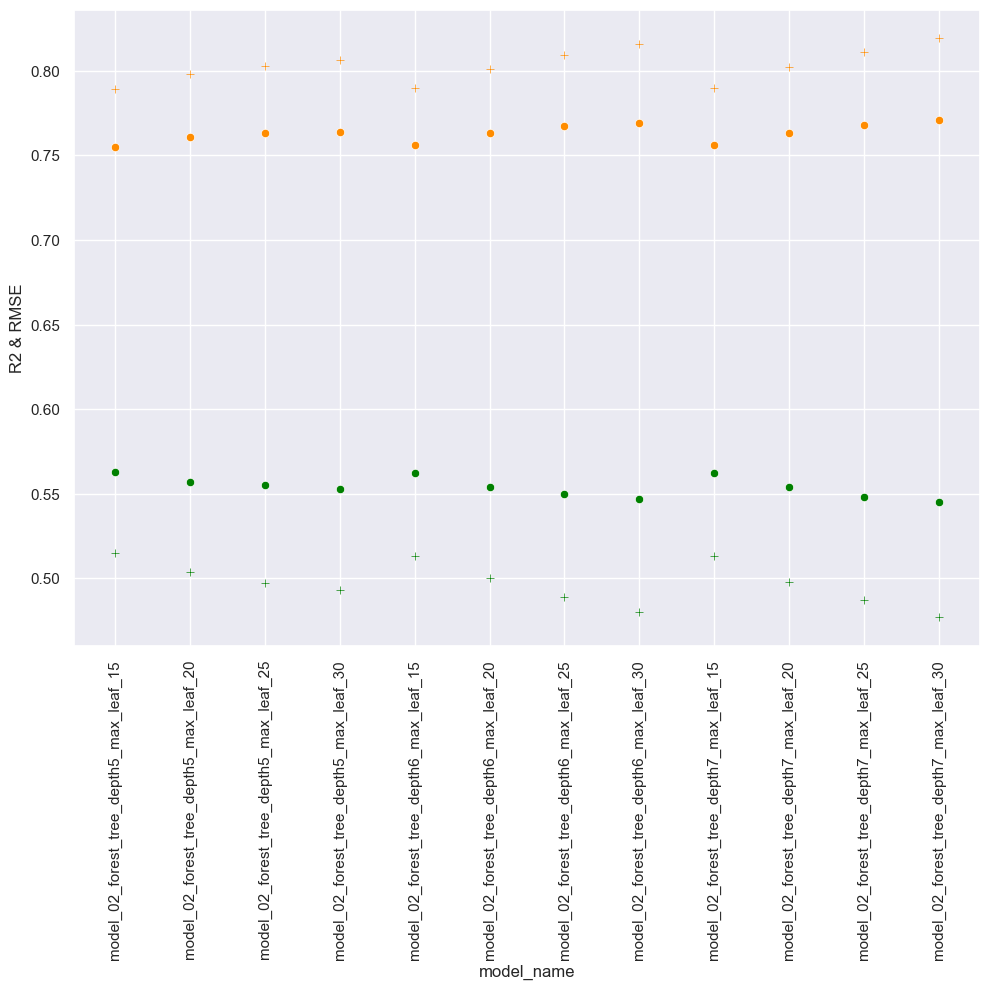

In [112]:
g=sns.scatterplot(data = random_trees_error_df, x = 'model_name', y = 'test_r2', color = 'darkorange')
g=sns.scatterplot(data = random_trees_error_df, x = 'model_name', y = 'test_rmse', color = 'green')
g=sns.scatterplot(data = random_trees_error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange')
g=sns.scatterplot(data = random_trees_error_df, x = 'model_name', y = 'train_rmse', marker='+', color = 'green')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(ylabel='R2 & RMSE')
plt.show();

Like in the decision tree model max_depth = 3 and max_leaf_node = 8 is the optimum, we can just choose this combination

In [113]:
#part_forest = random_trees_error_df.sort_values(by = ['test_r2', 'delta_R2'], ascending=[False, True]).iloc[:4]
part_forest = random_trees_error_df.sort_values(by = ['delta_R2', 'test_r2'], ascending=[True, False]).iloc[:4]
part_forest

,model_name,train_rmse,train_r2,test_rmse,test_r2,delta_RMSE,delta_R2,mean_node_num,mean_depth,num_of_trees
4,model_02_forest_tree_depth6_max_leaf_15,0.513,0.790,0.562,0.756,0.049,0.034,29,5,100
8,model_02_forest_tree_depth7_max_leaf_15,0.513,0.790,0.562,0.756,0.049,0.034,29,5,100
0,model_02_forest_tree_depth5_max_leaf_15,0.515,0.789,0.563,0.755,0.048,0.034,29,5,100
1,model_02_forest_tree_depth5_max_leaf_20,0.504,0.798,0.557,0.761,0.053,0.037,39,5,100


Test: AdaBoostRegressor

In [114]:
ada = AdaBoostRegressor(n_estimators=50, random_state=8)
ada.fit(X_train, y_train)


y_pred_ada_test = ada.predict(X_test)
y_pred_ada_train = ada.predict(X_train)

ada_boost_error = pd.DataFrame([{'model_name': model_name + '_ada_boost', 
                      'train_rmse': mean_squared_error(y_train, y_pred_ada_train, squared=False).round(3), 
                      'train_r2':adjusted_r2(y_train, y_pred_ada_train, X_train).round(3), 
                      'test_rmse': mean_squared_error(y_test, y_pred_ada_test, squared=False).round(3), 
                      'test_r2':adjusted_r2(y_test, y_pred_ada_test, X_test).round(3)}])

ada_boost_error['delta_RMSE'] = abs(ada_boost_error['train_rmse'] - ada_boost_error['test_rmse'])
ada_boost_error['delta_R2'] = abs(ada_boost_error['train_r2'] - ada_boost_error['test_r2'])
ada_boost_error

,model_name,train_rmse,train_r2,test_rmse,test_r2,delta_RMSE,delta_R2
0,model_02_ada_boost,0.548,0.761,0.591,0.731,0.043,0.03


that is really nice!!

In [35]:
ada.get_params()

{'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': 8}

Test:  GradientBoostingRegressor

In [115]:
gbr = GradientBoostingRegressor(n_estimators=50,
                                criterion= 'squared_error',
                                max_depth = 4, 
                                max_leaf_nodes = 14,
                                random_state=123)
gbr.fit(X_train, y_train)


y_pred_gbr_test = gbr.predict(X_test)
y_pred_gbr_train = gbr.predict(X_train)

gbr_boost_error = pd.DataFrame([{'model_name': model_name + '_gbr_boost', 
                      'train_rmse': mean_squared_error(y_train, y_pred_gbr_train, squared=False).round(3), 
                      'train_r2':adjusted_r2(y_train, y_pred_gbr_train, X_train).round(3), 
                      'test_rmse': mean_squared_error(y_test, y_pred_gbr_test, squared=False).round(3), 
                      'test_r2':adjusted_r2(y_test, y_pred_gbr_test, X_test).round(3)}])

gbr_boost_error['delta_RMSE'] = abs(gbr_boost_error['train_rmse'] - gbr_boost_error['test_rmse'])
gbr_boost_error['delta_R2'] = abs(gbr_boost_error['train_r2'] - gbr_boost_error['test_r2'])
gbr_boost_error


,model_name,train_rmse,train_r2,test_rmse,test_r2,delta_RMSE,delta_R2
0,model_02_gbr_boost,0.428,0.854,0.538,0.777,0.11,0.077


In [37]:
gbr.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': 12,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_iter_no_change': None,
 'random_state': 8,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

Concat the optimal models of each algorithm to one big error_df:  

In [116]:
error_df = pd.concat([part_lin_reg, 
                      part_knn,
                      part_dec_tree,
                      part_forest,
                      ada_boost_error,
                      gbr_boost_error],  axis = 0)
                      
error_df.sort_values(by = ['delta_R2', 'test_r2'], ascending=[True, False])

,model_name,train_rmse,train_r2,test_rmse,test_r2,delta_RMSE,delta_R2,mean_node_num,mean_depth,num_of_trees
2,model_02_lin_reg_3,0.561,0.749,0.583,0.738,0.022,0.011,NaN,NaN,NaN
4,model_02_knn_1_40,0.516,0.788,0.546,0.770,0.030,0.018,NaN,NaN,NaN
9,model_02_knn_2_40,0.518,0.786,0.549,0.768,0.031,0.018,NaN,NaN,NaN
3,model_02_lin_reg_4,0.557,0.753,0.586,0.735,0.029,0.018,NaN,NaN,NaN
1,model_02_lin_reg_2,0.570,0.741,0.599,0.723,0.029,0.018,NaN,NaN,NaN
2,model_02_knn_1_30,0.508,0.794,0.540,0.775,0.032,0.019,NaN,NaN,NaN
8,model_02_knn_2_35,0.514,0.789,0.547,0.770,0.033,0.019,NaN,NaN,NaN
14,model_02_knn_3_40,0.521,0.784,0.552,0.765,0.031,0.019,NaN,NaN,NaN
12,model_02_knn_3_30,0.511,0.792,0.543,0.772,0.032,0.020,NaN,NaN,NaN
0,model_02_ada_boost,0.548,0.761,0.591,0.731,0.043,0.030,NaN,NaN,NaN


/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_69864/1721775396.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


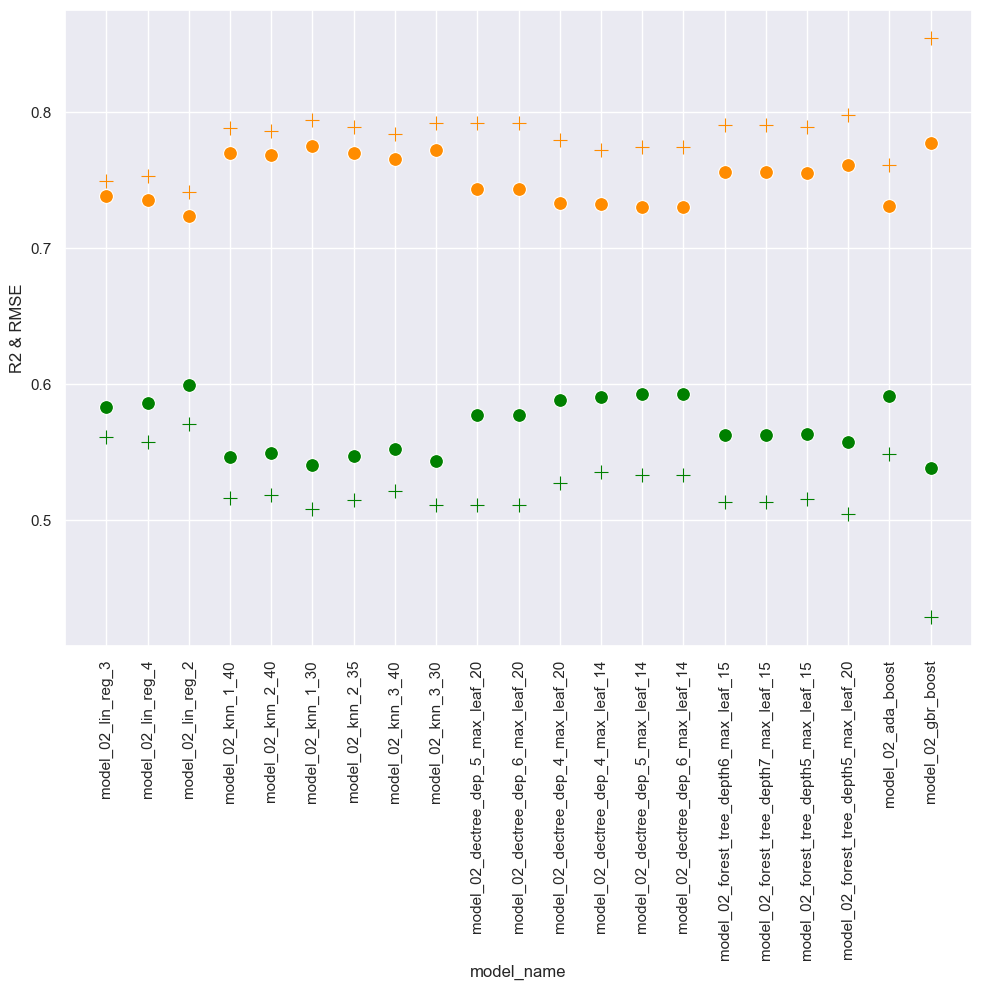

In [117]:
g=sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
g=sns.scatterplot(data = error_df, x = 'model_name', y = 'test_r2', color = 'darkorange', s=100)
g=sns.scatterplot(data = error_df, x = 'model_name', y = 'test_rmse', color = 'green', s=100)
g=sns.scatterplot(data = error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange', s=100)
g=sns.scatterplot(data = error_df, x = 'model_name', y = 'train_rmse', marker='+', color = 'green', s=100)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(ylabel='R2 & RMSE')
plt.show();